### Question to answer: How much are the spacy vectors effective in predicting the labels for the questions?

In [1]:
%matplotlib inline

In [7]:
import codecs
import re

from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import spacy

In [3]:
# download spacy dictionary 
nlp = spacy.load('en_core_web_lg')

In [4]:
# read dataset file into a list of lines
file_name = "train_5500.label"
with open(file_name, 'rb') as f:
    txt = f.read()
lines = txt.decode('latin').splitlines()

# build a dataframe with columns: 'label', 'sublabel','question'
df = []
for idx, line in enumerate(lines):
    match = re.match('([A-Z]+)\:([a-z]+)[ ]+(.+)',line)
    df.append(match.groups())
df = pd.DataFrame(df, columns = ['label', 'sublabel','question'])
df.head()

,label,sublabel,question
0,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR,exp,What is the full form of .com ?


In [5]:
vectors = []

for idx, row in df.iterrows():
    doc = nlp(row['question'])
    vectors.append(pd.DataFrame([t.vector for t in doc]).mean())

df_vec = pd.DataFrame(vectors)
print(df_vec.head())

        0         1         2         3         4         5         6    \
0 -0.095385  0.145313 -0.102526 -0.034010  0.075759 -0.141677  0.066431   
1  0.056004  0.079700  0.017709 -0.136104  0.157276  0.166497  0.065532   
2 -0.069375  0.152507 -0.249951 -0.120486  0.298487  0.019549  0.197415   
3 -0.062719 -0.012321 -0.038860 -0.120913  0.022380  0.007823  0.077755   
4  0.072690  0.114806 -0.159714 -0.006696  0.113063 -0.132307  0.162451   

        7         8         9    ...       290       291       292       293  \
0 -0.084729  0.013960  2.117576  ... -0.096183  0.159912  0.111225 -0.058195   
1 -0.085842 -0.032438  1.450033  ... -0.155592 -0.078499 -0.215343  0.130424   
2 -0.165814  0.029086  2.123617  ... -0.190413  0.026192 -0.060264 -0.056614   
3 -0.024781  0.101000  1.992542  ... -0.164768  0.041619 -0.083150 -0.126231   
4  0.003159 -0.033583  1.786263  ... -0.097932 -0.127476  0.085656 -0.251220   

        294       295       296       297       298       299  
0  0

In [51]:
df_label_dummy = pd.get_dummies(df.label)
df_vec_label = pd.concat([df_vec, df_label_dummy], axis=1)
df_vec_label_corr = df_vec_label.corr(method='pearson')
#df_vec_label_corr.style.background_gradient(cmap='coolwarm', axis=None)

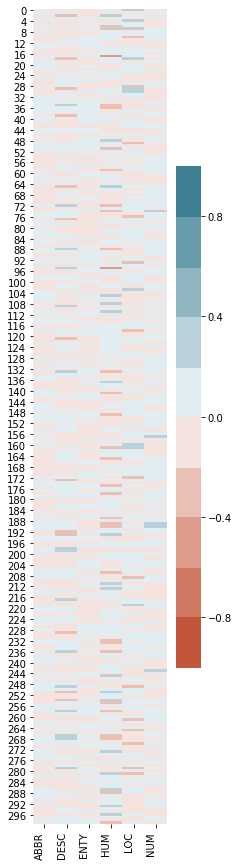

In [13]:
df_vec_label_corr_sliced = df_vec_label_corr.iloc[:300,300:]

fig, ax = plt.subplots(figsize=(3,15))

ax = sns.heatmap(
    df_vec_label_corr_sliced, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=10),
    square=False, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

             ABBR        DESC        ENTY         HUM         LOC         NUM
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000
mean     0.045161    0.098966    0.052513    0.106408    0.087560    0.068668
std      0.032028    0.067022    0.038222    0.082590    0.065542    0.049468
min      0.000348    0.002236    0.000175    0.001020    0.001878    0.000827
25%      0.019682    0.043406    0.020919    0.041843    0.032170    0.027056
50%      0.039632    0.087675    0.045340    0.089428    0.072818    0.062449
75%      0.064408    0.147725    0.076793    0.152571    0.126824    0.095375
max      0.145719    0.308556    0.202755    0.414602    0.312982    0.273470


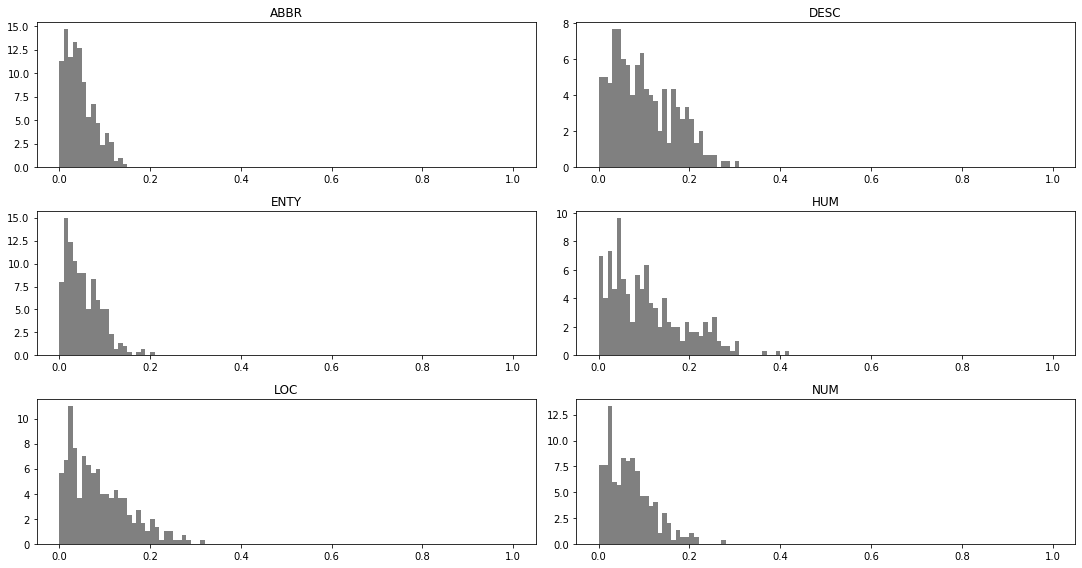

In [45]:
print(df_vec_label_corr_sliced.abs().describe())

plt.rcParams['figure.figsize'] = [15, 8]
df_vec_label_corr_sliced.abs().hist(bins=100, range=(0,1), histtype = 'bar', grid=False, density=True, color='Gray');
plt.tight_layout()


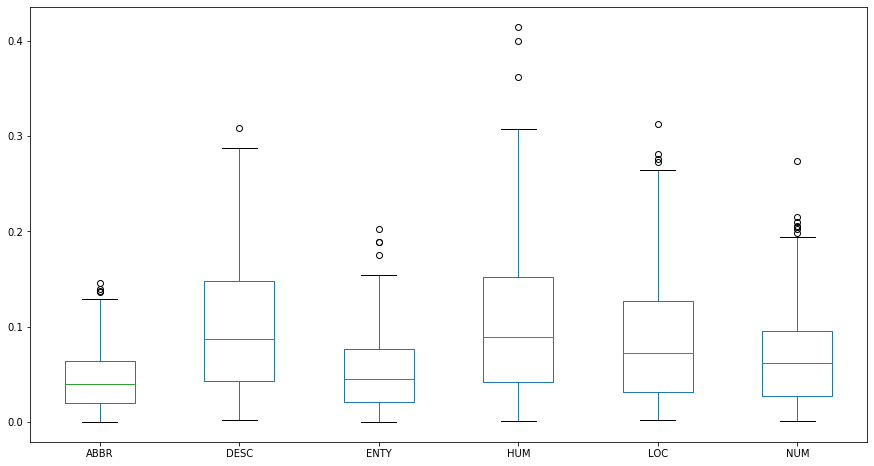

In [50]:
df_vec_label_corr_sliced.abs().boxplot(grid=False);

## Answer: 

We expect ABBR and ENTY labels exhibit a lower classification accuracy when the 300-dimensional Spacy document vectors are used. The reason is the correlations between the true labels and the vectors appear to be low for these two groups.

In contrast, HUM and DESC labels are expected to have a better classification accuracy.